In [10]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

from meta.custom_env import CustomEnv
from utils.fetch_data import Api, fetch_data

data = fetch_data(Api.YAHOO, 'BTC-USD', '2015-01-01', '2023-01-01')

env = CustomEnv(data, action_space=3, observation_space=5)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1_000_000, log_interval=1000)

[*********************100%***********************]  1 of 1 completed


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [12]:
model.save("ppo_custom_env")

[*********************100%***********************]  1 of 1 completed

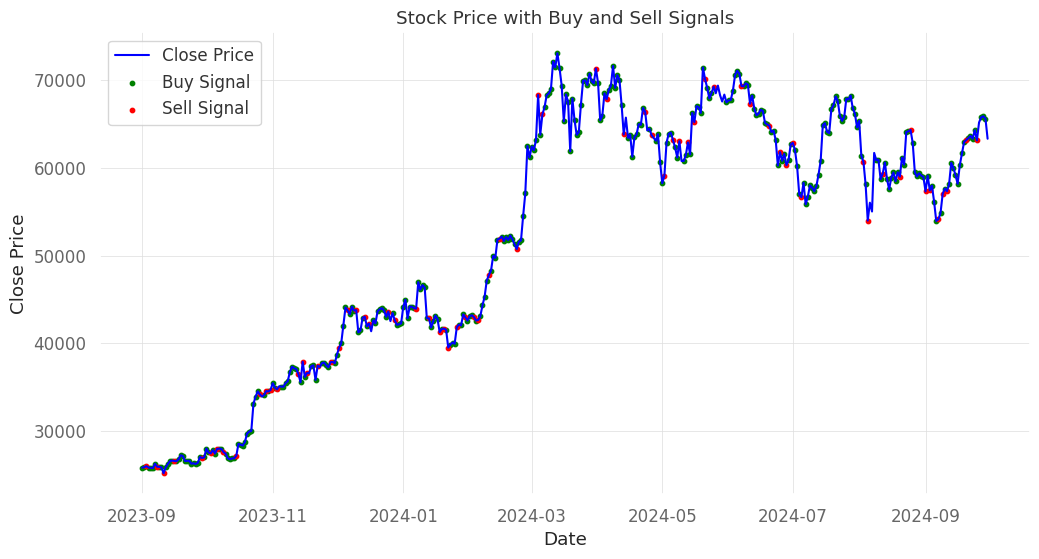

                    Strategy
------------------  ----------
Start Period        2023-09-01
End Period          2024-09-29
Risk-Free Rate      0.0%
Time in Market      78.0%

Cumulative Return   30.91%
CAGR﹪              18.8%

Sharpe              1.12
Prob. Sharpe Ratio  92.47%
Sortino             1.82
Sortino/√2          1.28
Omega               1.33

Max Drawdown        -13.7%
Longest DD Days     64

Gain/Pain Ratio     0.33
Gain/Pain (1M)      1.62

Payoff Ratio        1.21
Profit Factor       1.33
Common Sense Ratio  1.7
CPC Index           0.85
Tail Ratio          1.28
Outlier Win Ratio   8.81
Outlier Loss Ratio  4.35

MTD                 0.96%
3M                  -1.71%
6M                  -3.31%
YTD                 10.56%
1Y                  30.07%
3Y (ann.)           18.8%
5Y (ann.)           18.8%
10Y (ann.)          18.8%
All-time (ann.)     18.8%

Avg. Drawdown       -2.18%
Avg. Drawdown Days  13
Recovery Factor     2.12
Ulcer Index         0.05
Serenity Index      0.62


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


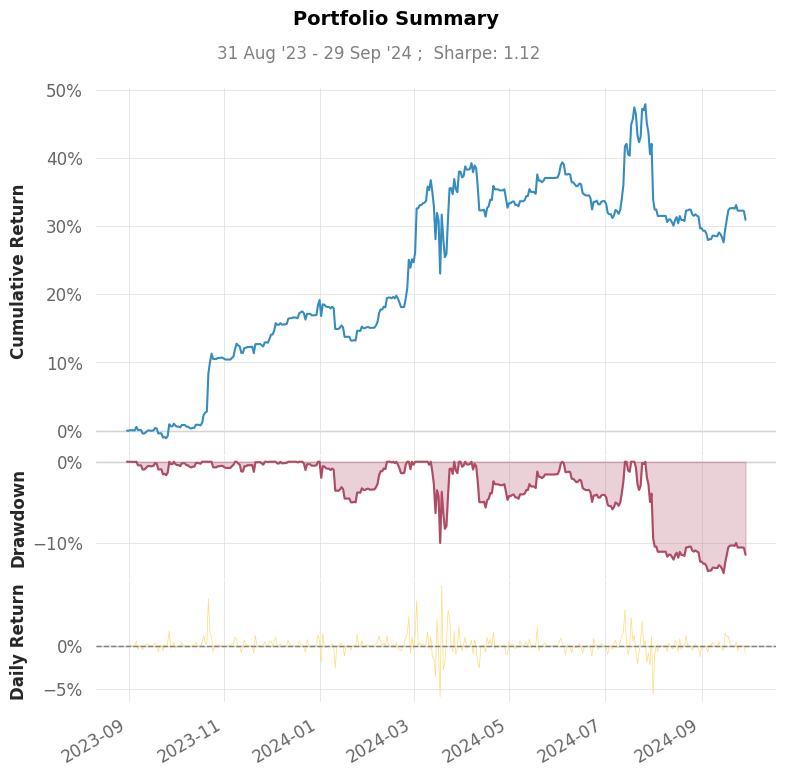

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


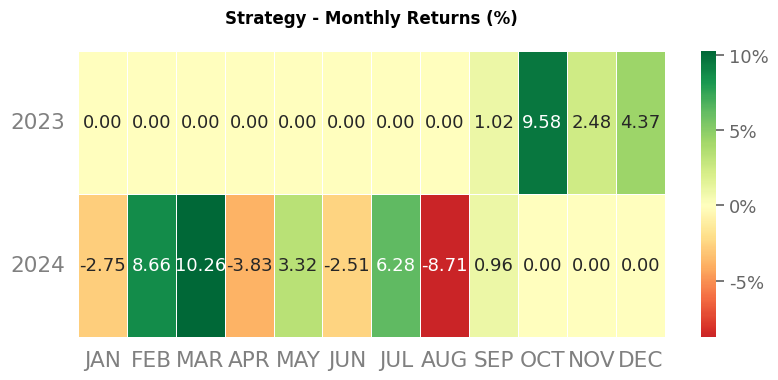

In [ ]:
import pandas as pd
import quantstats as qs
from utils.plot_buy_and_sell import plot_buy_and_sell

test_data = fetch_data(Api.YAHOO, 'BTC-USD', '2024-09-01', '2024-10-01')
test_model = PPO.load("ppo_custom_env")

test_env = CustomEnv(test_data, action_space=3, observation_space=5)
check_env(test_env)

portfolio_values = []

observation, info = test_env.reset()

while True:
    action, _states = test_model.predict(observation)

    observation, reward, terminated, truncated, info = test_env.step(action)
    done = terminated or truncated
    portfolio_values.append(info['portfolio_value'])

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.index)

plot_buy_and_sell(actions_data)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)